# Machine Learning Analysis

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import datetime
import pickle
import seaborn as sns
import statsmodels.api as sm

/Users/faisalmahmood/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_pickle('weather_ozone')
df.head()

,ozone_ppm,SPD,VSB,TEMP,DEWP,STP
datetime,,,,,,
2008-01-01 00:00:00,0.019,8,10.0,41,39,1018.1
2008-01-01 01:00:00,0.020,8,10.0,41,41,1017.2
2008-01-01 02:00:00,0.020,8,10.0,42,41,1016.5
2008-01-01 03:00:00,0.019,12,10.0,43,41,1015.0
2008-01-01 04:00:00,0.019,13,10.0,43,42,1014.2


In [4]:
#Split to training and test sets
train = df['2008-01-01':'2015-11-30']
test  = df['2015-12-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

('Train Dataset:', (67579, 6))
('Test Dataset:', (742, 6))


In [5]:
#Define variables for training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

X_train = train.drop('ozone_ppm', axis=1).values
y_train = train.ozone_ppm.values

#Create regressor
lm = LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train, y_train)

#Training set
print "Training set accuracy scores:"
print ''
y_pred_train = lm.predict(X_train)
print("R^2: {}".format(lm.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error: {}".format(mae))

Training set accuracy scores:

R^2: 0.582197679433
Root Mean Squared Error: 0.0113865390885
Mean Absolute Error: 0.00903829888978


In [6]:
#Define variables for testing set
X_test = test.drop('ozone_ppm', axis=1).values
y_test = test.ozone_ppm.values

# Predict on the test data
y_pred_test = lm.predict(X_test)

#Test set
print "Test set accuracy scores:"
print ''
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error: {}".format(mae))
#MEAN ABSOLUTE ERROR TOO
#GridSearchCV for Lasso/Ridge
#Mean absolute percent error (mape) mae/actual

Test set accuracy scores:

R^2: 0.0432025252226
Root Mean Squared Error: 0.00903532790804
Mean Absolute Error: 0.00742406213061


In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

print "Lasso regularization scores for training set:"
print ''
alpha_L = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 100]
for alpha in alpha_L:
    lasso = Lasso(alpha=alpha, normalize=True)
    lasso.fit(X_train, y_train)
    lasso_score = lasso.score(X_train, y_train)
    print "R^2 is %f when alpha = "%lasso_score,alpha

Lasso regularization scores for training set:

R^2 is 0.582198 when alpha =  1e-15
R^2 is 0.582198 when alpha =  1e-10
R^2 is 0.582197 when alpha =  1e-08
R^2 is 0.426375 when alpha =  1e-05
R^2 is 0.000000 when alpha =  0.0001
R^2 is 0.000000 when alpha =  0.001
R^2 is 0.000000 when alpha =  0.01
R^2 is 0.000000 when alpha =  1
R^2 is 0.000000 when alpha =  5
R^2 is 0.000000 when alpha =  10
R^2 is 0.000000 when alpha =  100


In [8]:
lasso = Lasso(alpha=1e-15, normalize=True)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print "Lasso test set accuracy scores:"
print ''
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error: {}".format(mae))


Lasso test set accuracy scores:

R^2: 0.0432025252194
Root Mean Squared Error: 0.00903532790806
Mean Absolute Error: 0.00742406213071


In [9]:
from sklearn.linear_model import Ridge

print "Ridge regularization scores for training set:"
print ''
alpha_L = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 100]
for alpha in alpha_L:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_train, y_train)
    print "R^2 is %f when alpha = "%ridge_score,alpha

Ridge regularization scores for training set:

R^2 is 0.582198 when alpha =  1e-15
R^2 is 0.582198 when alpha =  1e-10
R^2 is 0.582198 when alpha =  1e-08
R^2 is 0.582198 when alpha =  1e-05
R^2 is 0.582197 when alpha =  0.0001
R^2 is 0.582157 when alpha =  0.001
R^2 is 0.579106 when alpha =  0.01
R^2 is 0.359387 when alpha =  1
R^2 is 0.162587 when alpha =  5
R^2 is 0.096527 when alpha =  10
R^2 is 0.011614 when alpha =  100


In [10]:
ridge = Ridge(alpha=1e-15, normalize=True)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print "Ridge test set accuracy scores:"
print ''
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error: {}".format(mae))


Ridge test set accuracy scores:

R^2: 0.0432025252226
Root Mean Squared Error: 0.00903532790804
Mean Absolute Error: 0.00742406213061


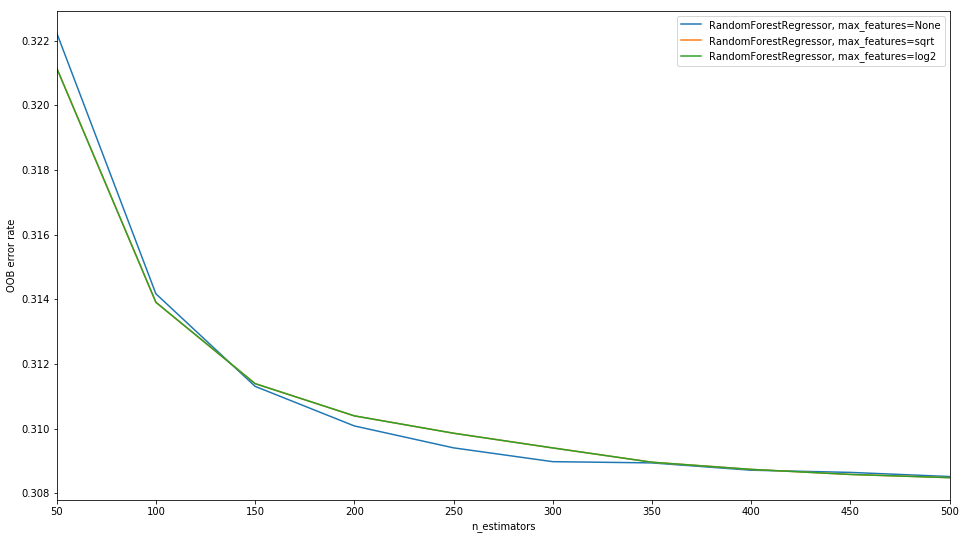

In [11]:
from sklearn.ensemble import RandomForestRegressor
from collections import OrderedDict

_ = plt.rcParams['figure.figsize'] = [16, 9]

ensemble_regs = [
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=42)),
    ("RandomForestRegressor, max_features=sqrt",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=42)),
    ("RandomForestRegressor, max_features=log2",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=42))

]

error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 500

for label, reg in ensemble_regs:
    for i in range(min_estimators, max_estimators + 1, 50):
        reg.set_params(n_estimators=i)
        reg.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

_ = plt.xlim(min_estimators, max_estimators)
_ = plt.xlabel("n_estimators")
_ = plt.ylabel("OOB error rate")
_ = plt.legend(loc="upper right")
_ = plt.show()
                   

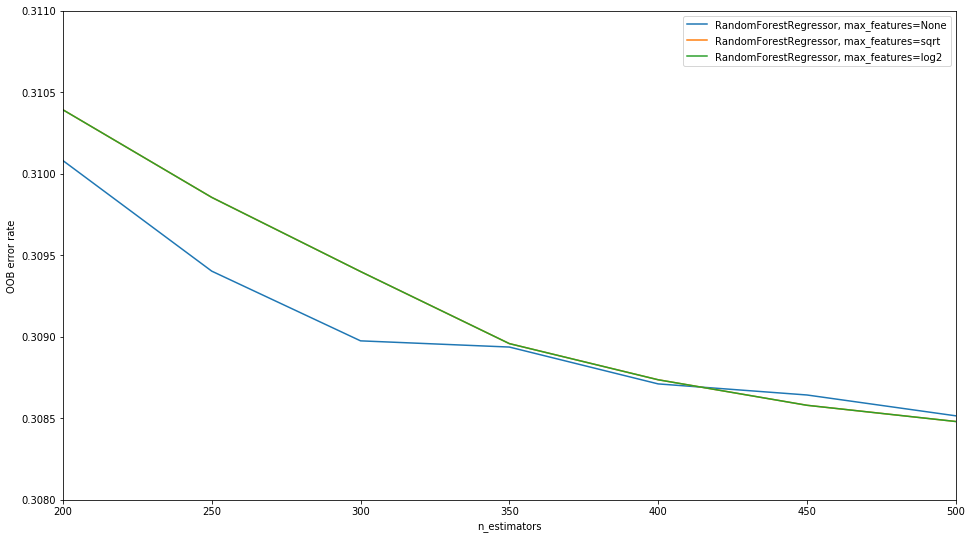

In [12]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

_ = plt.xlim(200, max_estimators)
_ = plt.ylim(0.308, 0.311)
_ = plt.xlabel("n_estimators")
_ = plt.ylabel("OOB error rate")
_ = plt.legend(loc="upper right")
_ = plt.show()


In [13]:
error_rate

OrderedDict([('RandomForestRegressor, max_features=None',
              [(50, 0.32223567579654522),
               (100, 0.31416688525894054),
               (150, 0.31130442469061348),
               (200, 0.3100805460896785),
               (250, 0.30940266361243995),
               (300, 0.30897524092347384),
               (350, 0.30893723307872101),
               (400, 0.30871126085329015),
               (450, 0.30864330652211935),
               (500, 0.30851554453590113)]),
             ('RandomForestRegressor, max_features=sqrt',
              [(50, 0.32114877341167014),
               (100, 0.31390363616068018),
               (150, 0.31138886395578258),
               (200, 0.31039203939265092),
               (250, 0.30985493112437834),
               (300, 0.30940026356814987),
               (350, 0.30895828956254401),
               (400, 0.30873666486669116),
               (450, 0.30858016587050141),
               (500, 0.30848073353569394)]),
             ('RandomFo

In [14]:
rf = RandomForestRegressor(n_estimators=500, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
print "Random Forest test set accuracy scores:"
print ''
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error: {}".format(mae))

Random Forest test set accuracy scores:

R^2: 0.089999847083
Root Mean Squared Error: 0.00881159729491
Mean Absolute Error: 0.00678782734193


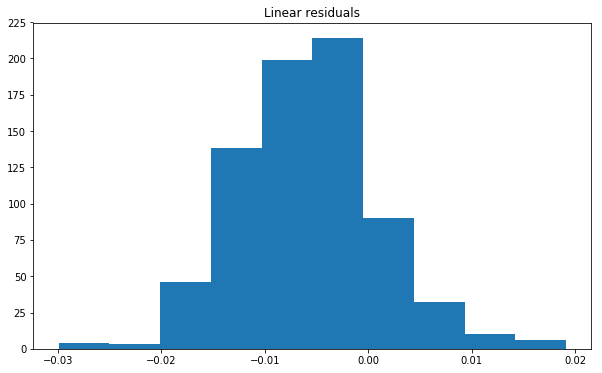

In [16]:
_ = plt.rcParams['figure.figsize'] = [10, 6]
_ = plt.hist(y_test-y_pred_test)
_ = plt.title("Linear residuals")

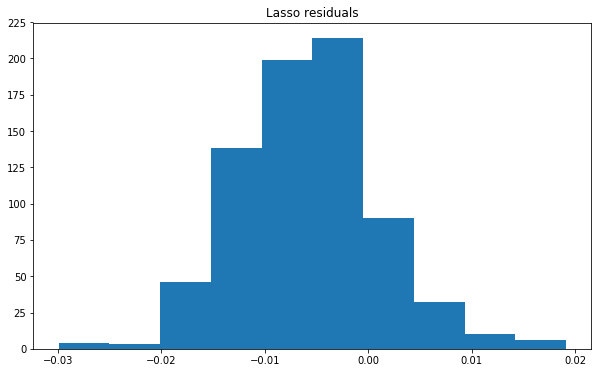

In [17]:
_ = plt.hist(y_test-y_pred_lasso)
_ = plt.title("Lasso residuals")

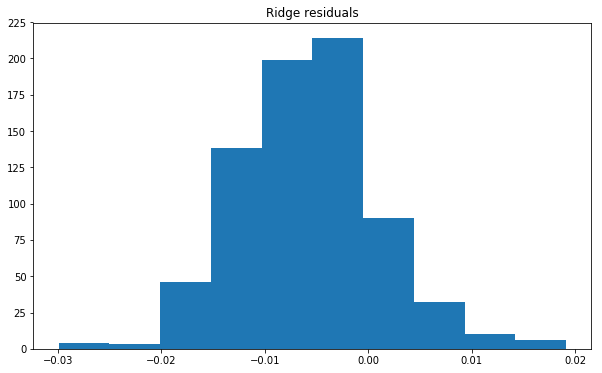

In [18]:
_ = plt.hist(y_test-y_pred_ridge)
_ = plt.title("Ridge residuals")

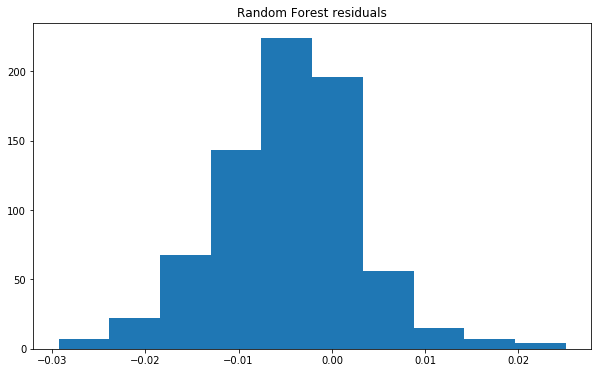

In [19]:
_ = plt.hist(y_test-y_pred_rf)
_ = plt.title("Random Forest residuals")

*****

# Summer-only analysis (June to September)

In [20]:
#Split to training and test sets
summer_df = df[df.index.month.isin([6,7,8,9])]
train = summer_df['2008':'2014']
test  = summer_df['2015']
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

('Train Dataset:', (19969, 6))
('Test Dataset:', (2845, 6))


In [21]:
X_train = train.drop('ozone_ppm', axis=1).values
y_train = train.ozone_ppm.values

#Create regressor
lm = LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train, y_train)

#Training set
print "Training set accuracy scores:"
print ''
y_pred_train = lm.predict(X_train)
print("R^2: {}".format(lm.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error: {}".format(mae))

Training set accuracy scores:

R^2: 0.61954291927
Root Mean Squared Error: 0.0120153737564
Mean Absolute Error: 0.0093943006521


In [22]:
X_test = test.drop('ozone_ppm', axis=1).values
y_test = test.ozone_ppm.values

# Predict on the test data
y_pred_test = lm.predict(X_test)

#Test set
print "Test set accuracy scores:"
print ''
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error: {}".format(mae))

Test set accuracy scores:

R^2: 0.616979835465
Root Mean Squared Error: 0.0108932691041
Mean Absolute Error: 0.00867100523515


In [23]:
print "Lasso regularization scores for training set:"
print ''
alpha_L = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 100]
for alpha in alpha_L:
    lasso = Lasso(alpha=alpha, normalize=True)
    lasso.fit(X_train, y_train)
    lasso_score = lasso.score(X_train, y_train)
    print "R^2 is %f when alpha = "%lasso_score,alpha

Lasso regularization scores for training set:

R^2 is 0.619543 when alpha =  1e-15
R^2 is 0.619543 when alpha =  1e-10
R^2 is 0.619543 when alpha =  1e-08
R^2 is 0.589622 when alpha =  1e-05
R^2 is 0.000000 when alpha =  0.0001
R^2 is 0.000000 when alpha =  0.001
R^2 is 0.000000 when alpha =  0.01
R^2 is 0.000000 when alpha =  1
R^2 is 0.000000 when alpha =  5
R^2 is 0.000000 when alpha =  10
R^2 is 0.000000 when alpha =  100


In [24]:
lasso = Lasso(alpha=1e-15, normalize=True)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print "Lasso test set accuracy scores:"
print ''
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error: {}".format(mae))

Lasso test set accuracy scores:

R^2: 0.616979835465
Root Mean Squared Error: 0.0108932691041
Mean Absolute Error: 0.00867100523515


In [25]:
print "Ridge regularization scores for training set:"
print ''
alpha_L = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 100]
for alpha in alpha_L:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_train, y_train)
    print "R^2 is %f when alpha = "%ridge_score,alpha

Ridge regularization scores for training set:

R^2 is 0.619543 when alpha =  1e-15
R^2 is 0.619543 when alpha =  1e-10
R^2 is 0.619543 when alpha =  1e-08
R^2 is 0.619543 when alpha =  1e-05
R^2 is 0.619543 when alpha =  0.0001
R^2 is 0.619541 when alpha =  0.001
R^2 is 0.619361 when alpha =  0.01
R^2 is 0.450780 when alpha =  1
R^2 is 0.207093 when alpha =  5
R^2 is 0.123400 when alpha =  10
R^2 is 0.014896 when alpha =  100


In [26]:
ridge = Ridge(alpha=1e-15, normalize=True)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print "Ridge test set accuracy scores:"
print ''
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error: {}".format(mae))


Ridge test set accuracy scores:

R^2: 0.616979835465
Root Mean Squared Error: 0.0108932691041
Mean Absolute Error: 0.00867100523515


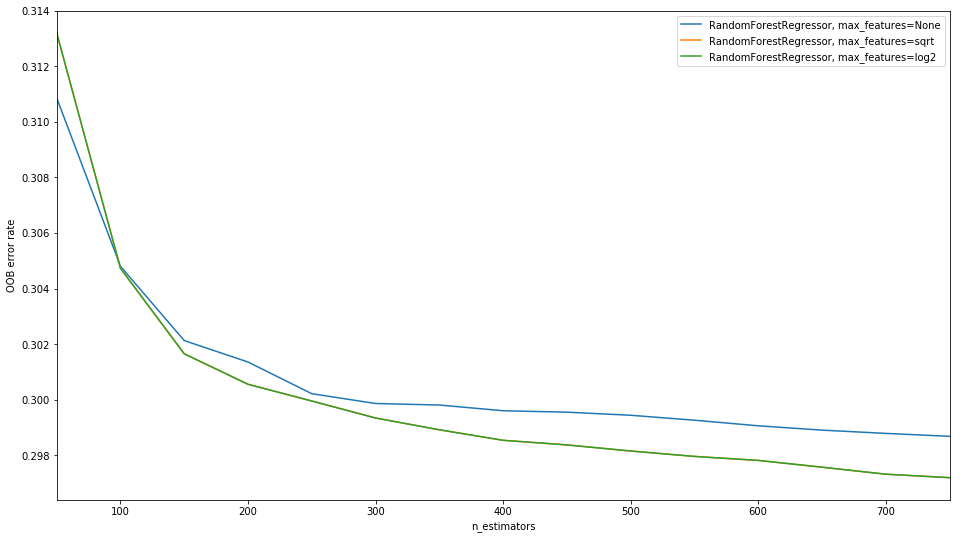

In [27]:
_ = plt.rcParams['figure.figsize'] = [16, 9]

ensemble_regs = [
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=42)),
    ("RandomForestRegressor, max_features=sqrt",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=42)),
    ("RandomForestRegressor, max_features=log2",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=42))

]

error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 750

for label, reg in ensemble_regs:
    for i in range(min_estimators, max_estimators + 1, 50):
        reg.set_params(n_estimators=i)
        reg.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

_ = plt.xlim(min_estimators, max_estimators)
_ = plt.xlabel("n_estimators")
_ = plt.ylabel("OOB error rate")
_ = plt.legend(loc="upper right")
_ = plt.show()

In [28]:
error_rate

OrderedDict([('RandomForestRegressor, max_features=None',
              [(50, 0.31085972355222102),
               (100, 0.30480087687084922),
               (150, 0.30212667786875547),
               (200, 0.30135428997820457),
               (250, 0.30021411722121671),
               (300, 0.2998615442969933),
               (350, 0.29980656986394094),
               (400, 0.29960061696221185),
               (450, 0.29954979324762143),
               (500, 0.29943829616660533),
               (550, 0.29925976067016768),
               (600, 0.2990594833469008),
               (650, 0.29890288814191313),
               (700, 0.29878567846119441),
               (750, 0.29867994680014487)]),
             ('RandomForestRegressor, max_features=sqrt',
              [(50, 0.31320254378535806),
               (100, 0.30472729290850353),
               (150, 0.3016498980255673),
               (200, 0.30055326803044158),
               (250, 0.29995110547285408),
               (300, 0.2993

In [29]:
rf = RandomForestRegressor(n_estimators=750, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
print "Random Forest test set accuracy scores:"
print ''
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error: {}".format(mae))

Random Forest test set accuracy scores:

R^2: 0.594303997616
Root Mean Squared Error: 0.0112110884086
Mean Absolute Error: 0.00875663544491


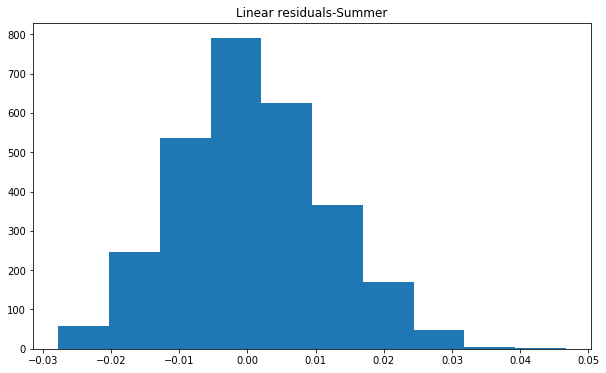

In [31]:
_ = plt.rcParams['figure.figsize'] = [10, 6]
_ = plt.hist(y_test-y_pred_test)
_ = plt.title("Linear residuals-Summer")

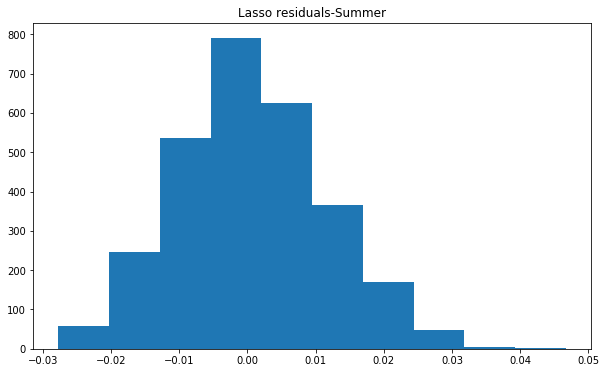

In [32]:
_ = plt.hist(y_test-y_pred_lasso)
_ = plt.title("Lasso residuals-Summer")

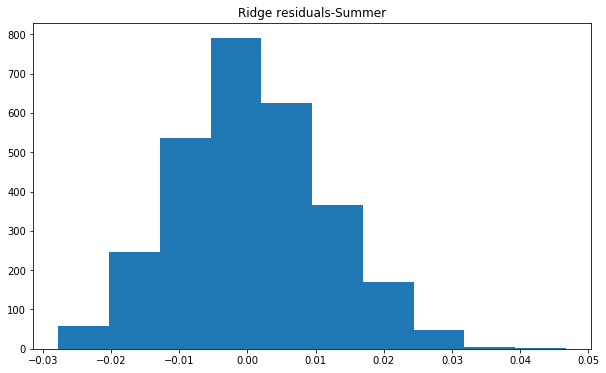

In [33]:
_ = plt.hist(y_test-y_pred_ridge)
_ = plt.title("Ridge residuals-Summer")

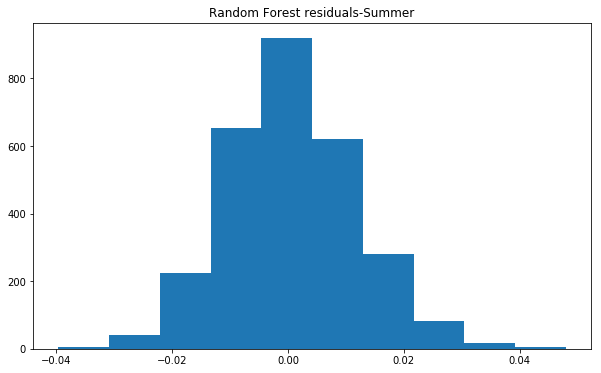

In [34]:
_ = plt.hist(y_test-y_pred_rf)
_ = plt.title("Random Forest residuals-Summer")

In [35]:
#Conclusions
#comparisons of results
#Take care of storytelling, milestone, final report
#Final report, maybe organize into tables. Upper and lower bounds of 95% for histogram.
#Use Google docs or Word for final report
#Github, have one entry for capstone.... folder for code, folder for documents.